##### **Kaggle Dataset**
Dataset: https://www.kaggle.com/competitions/playground-series-s3e22/overview

Column Information: https://www.kaggle.com/datasets/yasserh/horse-survival-dataset

##### **Challenge**
- Given various medical indicators, predict the health outcomes of horses.
  
##### **Data Description**
- train.csv (229.2 kB)
- test.csv (148.32 kB)
- 28 features not including the target variable
  - 12 numerical
  - 16 categorical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# import csv files/load data

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

numerical_columns = train.select_dtypes(include=['int', 'float']).columns
object_columns = train.select_dtypes(include=['object']).columns

## **Data Understanding**

In [3]:
# rows and columns
train.shape

(1235, 29)

In [4]:
# categorical vs numerical
dtype={}
for col in train.columns:
    type_=train[col].dtypes
    if type_=="float64" or type_=="int64":
        type_str="numerical"
    else:
        type_str="categorical"
    dtype.update({col:type_str})

features_df=pd.DataFrame([dtype], index=["data_type"]).T

# value
value={}
for col in train.columns:
    dtype = train[col].dtype
    if dtype=="float64" or dtype=="int64":
        min_=train[col].min()
        max_=train[col].max()
        value.update({col:f"{min_} - {max_}"})
    else:
        count=train[col].nunique()
        value.update({col:f"0 - {count-1}"})

# missing values
null={}
for col in train.columns:
    null_count=train[col].isnull().sum()
    null.update({col:null_count})

# percent null values
per_null={}
for col in train.columns:
    null_per=(train[col].isnull().sum()/len(train[col]))*100
    per_null[col] = null_per

# outliers: based on IQR method
def outliers(column):
    import numpy as np
    Q1=np.percentile(column, 25)
    Q3=np.percentile(column, 75)
    IQR=Q3-Q1
    upper_bound=1.5*IQR+Q3
    lower_bound=Q1-1.5*IQR
    no_outliers=(column<upper_bound) & (column>lower_bound)
    num_outliers=(column>upper_bound) & (column<lower_bound)
    return no_outliers, num_outliers

outlier={}
for col in numerical_columns:
    clean,out=outliers(train[col])
    count=out.sum()
    outlier.update({col:count})



features_df["value_range"]=value
features_df["null_count"]=null
features_df["null_%"]=per_null
features_df["outlier_count"]=outlier

features_df

,data_type,value_range,null_count,null_%,outlier_count
id,numerical,0 - 1234,0,0.000000,0.0
surgery,categorical,0 - 1,0,0.000000,NaN
age,categorical,0 - 1,0,0.000000,NaN
hospital_number,numerical,521399 - 5305129,0,0.000000,0.0
rectal_temp,numerical,35.4 - 40.8,0,0.000000,0.0
pulse,numerical,30.0 - 184.0,0,0.000000,0.0
respiratory_rate,numerical,8.0 - 96.0,0,0.000000,0.0
temp_of_extremities,categorical,0 - 3,39,3.157895,NaN
peripheral_pulse,categorical,0 - 3,60,4.858300,NaN
mucous_membrane,categorical,0 - 5,21,1.700405,NaN


In [5]:
# target
### column: outcome
### categorical: lived, died, euthanized --> will label encode
train["outcome"].unique()

array(['died', 'euthanized', 'lived'], dtype=object)

## **Data Visualization**

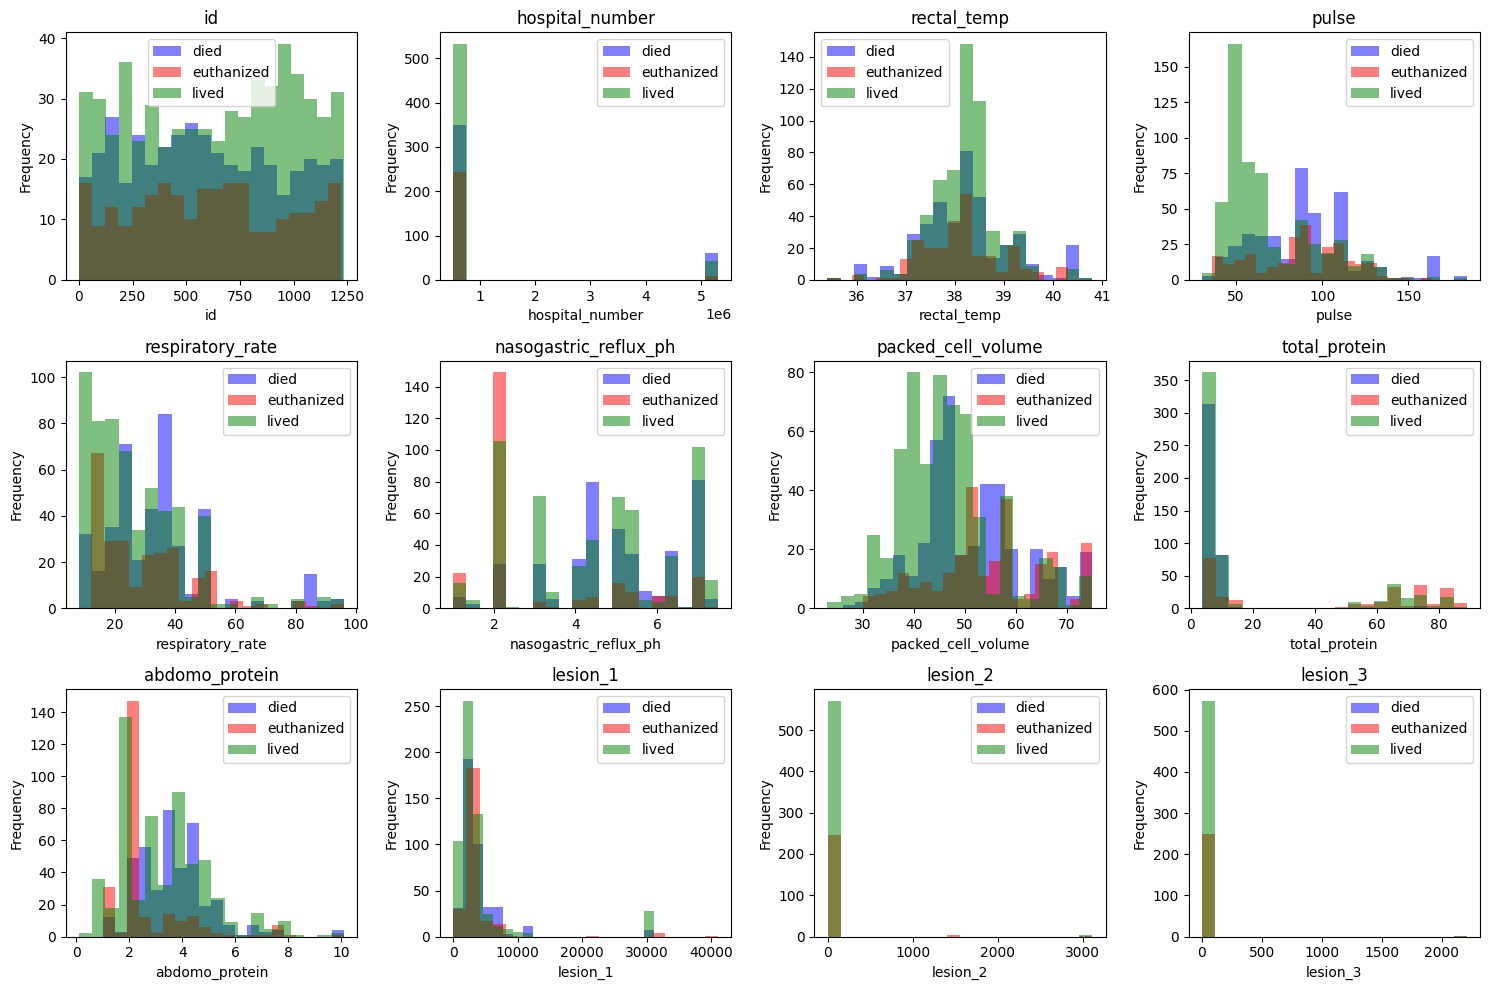

In [6]:
categorical_feature = 'outcome'
categories = train[categorical_feature].unique()
colors = ['blue', 'red', 'green']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 4, i)
    for j, category in enumerate(categories):
        category_data = train[train[categorical_feature] == category]
        plt.hist(category_data[col], bins=20, color=colors[j], alpha=0.5, label=category)

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

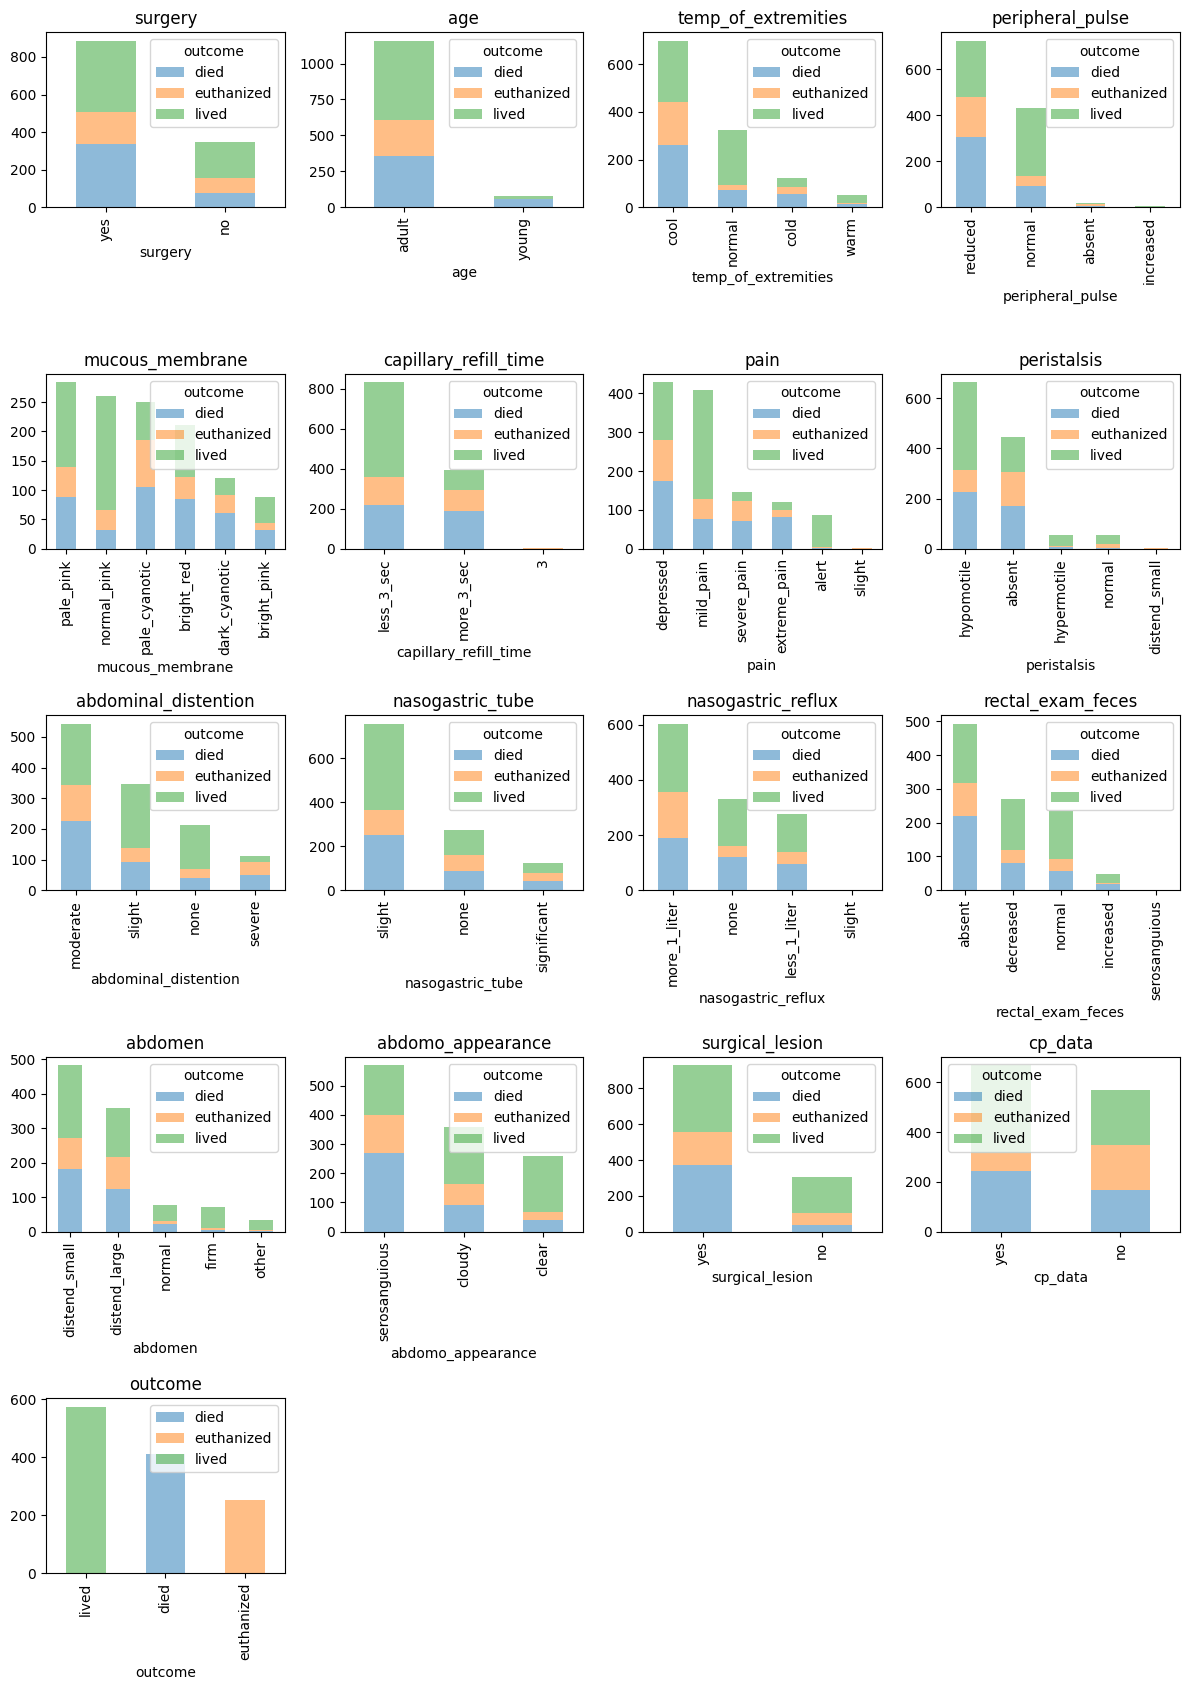

In [7]:
plt.figure(figsize=(12, 17))
reference_column = 'outcome'

reference_counts = train[reference_column].value_counts()
reference_categories = reference_counts.index
reference_values = reference_counts.values

for i, col in enumerate(object_columns):
    plt.subplot(5, 4, i + 1)

    category_counts = train.groupby([col, reference_column]).size().unstack(fill_value=0)
    category_counts['Total'] = category_counts.sum(axis=1)
    category_counts = category_counts.sort_values(by='Total', ascending=False)
    category_counts.drop('Total', axis=1, inplace=True)

    category_counts.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.5)

    plt.title(col)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.legend()
plt.show()

## **Preprocessing** (training set)

In [8]:
train_clean=train.copy()

In [9]:
# duplicates
print("number of duplicates: ",train_clean.duplicated().sum())

number of duplicates:  0


In [10]:
# no outliers

In [11]:
# remove columns 
### id
### hospital_number
### cp_data

train_clean=train_clean.drop(["id","hospital_number","cp_data"], axis=1)

In [12]:
# null: all categorical features --> impute mode

impute_col=["temp_of_extremities","peripheral_pulse","mucous_membrane","capillary_refill_time",
            "pain","peristalsis","abdominal_distention","nasogastric_tube","nasogastric_reflux",
            "rectal_exam_feces","abdomen","abdomo_appearance"]

for col in impute_col:
    train_clean[col].fillna(train_clean[col].mode()[0], inplace=True)

/tmp/ipykernel_62051/4085402156.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean[col].fillna(train_clean[col].mode()[0], inplace=True)


In [13]:
train_clean.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'surgical_lesion', 'lesion_1',
       'lesion_2', 'lesion_3', 'outcome'],
      dtype='object')

In [14]:
# nasogastric_reflux has an inconsistant label ('slight')
# rectal_exam_feces has an inconsistant label ('serosanguious')
# peristalsis has an inconsistant label ('distend_small')
### replace word with mode

train_clean["nasogastric_reflux"].replace("slight",train_clean["nasogastric_reflux"].mode()[0], inplace=True)
train_clean["rectal_exam_feces"].replace("serosanguious",train_clean["rectal_exam_feces"].mode()[0], inplace=True)
train_clean["peristalsis"].replace("distend_small",train_clean["peristalsis"].mode()[0], inplace=True)

In [15]:
# one hot encode categorical variables

to_encode=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
           'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
           'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
           'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
           'outcome']

encoder=OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(train_clean[to_encode]).toarray())

In [16]:
# normalize numerical values

train_normalize=train_clean.copy()
train_normalize=train_normalize.drop(columns=to_encode)

scaler_minmax = MinMaxScaler()
train_normalize_df=pd.DataFrame(scaler_minmax.fit_transform(train_normalize))

In [17]:
encoded.shape

(1235, 58)

In [18]:
# final preprocessed product

training_data = pd.concat([train_normalize_df,encoded],axis=1)
training_data.to_csv('train_preprocessed.csv', index=False)

## **Preprocessing** (test set)

In [19]:
test_clean=test.copy()

In [20]:
# duplicates

print("number of duplicates: ",test_clean.duplicated().sum())

number of duplicates:  0


In [21]:
# no outliers

outlier_test={}
for col in numerical_columns:
    clean,out=outliers(test[col])
    count=out.sum()
    outlier_test.update({col:count})
outlier_test

{'id': 0,
 'hospital_number': 0,
 'rectal_temp': 0,
 'pulse': 0,
 'respiratory_rate': 0,
 'nasogastric_reflux_ph': 0,
 'packed_cell_volume': 0,
 'total_protein': 0,
 'abdomo_protein': 0,
 'lesion_1': 0,
 'lesion_2': 0,
 'lesion_3': 0}

In [22]:
# remove columns 
### id
### hospital_number
### cp_data

test_clean=test_clean.drop(["id","hospital_number","cp_data"], axis=1)

In [23]:
# null: all categorical features --> impute mode

impute_col=["temp_of_extremities","peripheral_pulse","mucous_membrane","capillary_refill_time",
            "pain","peristalsis","abdominal_distention","nasogastric_tube","nasogastric_reflux",
            "rectal_exam_feces","abdomen","abdomo_appearance"]

for col in impute_col:
    test_clean[col].fillna(test_clean[col].mode()[0], inplace=True)

/tmp/ipykernel_62051/281512906.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_clean[col].fillna(test_clean[col].mode()[0], inplace=True)


In [24]:
# one hot encode categorical variables

to_encode_test=['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
               'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
               'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
               'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion']

encoder_=OneHotEncoder()
encoded_test = pd.DataFrame(encoder_.fit_transform(test_clean[to_encode_test]).toarray())

In [25]:
# normalize numerical values

test_normalize=test_clean.copy()
test_normalize=test_normalize.drop(columns=to_encode_test)

scaler_minmax_ = MinMaxScaler()
test_normalize_df=pd.DataFrame(scaler_minmax_.fit_transform(test_normalize))

In [26]:
encoded_test.shape

(824, 55)

In [27]:
# final preprocessed product

test_data = pd.concat([test_normalize_df,encoded_test],axis=1)
test_data.to_csv('test_preprocessed.csv', index=False)